In [2]:
import h5py
import scipy
from scipy import fft
import scipy.signal as sig
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image
import torch.nn.functional as F
import os

In [58]:
f = h5py.File(r'../2018.01/GOLD_XYZ_OSC.0001_1024.hdf5', 'r')

In [53]:
modu_list = [16, 21]
classes = ['32PSK',
 '16APSK',
 '32QAM',
 'FM',
 'GMSK',
 '32APSK',
 'OQPSK',
 '8ASK',
 'BPSK',
 '8PSK',
 'AM-SSB-SC',
 '4ASK',
 '16PSK',
 '64APSK',
 '128QAM',
 '128APSK',
 'AM-DSB-SC',
 'AM-SSB-WC',
 '64QAM',
 'QPSK',
 '256QAM',
 'AM-DSB-WC',
 'OOK',
 '6QAM1']

SNRs = [5, 10, 15, 20]
for modu in modu_list:
    for SNR in SNRs:
        idx = classes[modu]
        print(modu, idx)
        ptr = int((modu*26+SNR)*4096 + 2333)
        os.makedirs('../examples/' + idx, exist_ok=True)
        print('../examples/' + idx + '/' +str(int(SNR/5))+'.h5')
        h5file = h5py.File('../examples/' + idx + '/' +str(int(SNR/5))+'.h5', 'w')
        h5file['data'] = f['X'][ptr]
        h5file['SNR'] = f['Z'][ptr]
        h5file.close()

16 AM-DSB-SC
../examples/AM-DSB-SC/1.h5
16 AM-DSB-SC
../examples/AM-DSB-SC/2.h5
16 AM-DSB-SC
../examples/AM-DSB-SC/3.h5
16 AM-DSB-SC
../examples/AM-DSB-SC/4.h5
21 AM-DSB-WC
../examples/AM-DSB-WC/1.h5
21 AM-DSB-WC
../examples/AM-DSB-WC/2.h5
21 AM-DSB-WC
../examples/AM-DSB-WC/3.h5
21 AM-DSB-WC
../examples/AM-DSB-WC/4.h5


In [59]:
h5file = h5py.File('../examples/FM/4.h5')
print(h5file['modu'])
h5file.close()

KeyError: "Unable to open object (object 'modu' doesn't exist)"

In [91]:
f_train = h5py.File(r'../Dataset/train/modu_3.h5', 'r')

In [92]:
print(f_train['Z'][-8000])

[22.]


(893952, 2)
[[ 4.3837252e-05  6.9845431e-05]
 [-7.1672534e-05  4.9433398e-05]
 [ 7.7130127e-05  9.8093216e-05]
 [-3.2865475e-05  2.1416214e-05]
 [-5.6535540e-05 -6.2570405e-05]
 [ 2.6733829e-05 -1.0649577e-05]
 [-1.7631508e-05 -4.3777536e-06]
 [-1.3164550e-04  1.6896842e-05]
 [-8.3524916e-05 -7.1538627e-05]
 [-8.2896593e-05  6.6067987e-05]]


/home/weich/anaconda3/envs/RFF/lib/python3.7/site-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == "__main__":


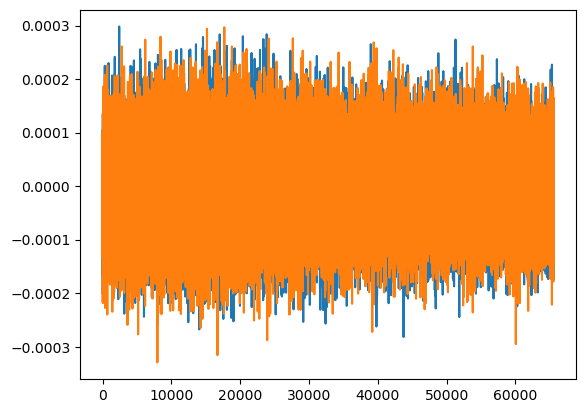

In [38]:
# num = -9000
# sample = f_train['X'][num]
# label = f_train['Y'][num]
# print()
# sample = f['X'][num]
# label = f['Y'][num]
# print(sample[:10])
# radio = wav.read('../datasets/20230211/AM/HDSDR_20230211_020816Z_900kHz_IF.wav')
radio = wav.read('../datasets/2FSK/HDSDR_20230211_130210Z_21086kHz_IF.wav')
sample = np.array(radio[1])
print(sample.shape)
sample = sample[10000:10000+65536]
print(sample[:10])
plt.figure()
plt.plot(sample)

In [39]:
# print(sample_complex.shape)
sample_complex = sample[:,0] + sample[:,1] * 1j
freq, time, Z = sig.stft(sample_complex, nperseg=512, return_onesided=False, fs=600)
zeropoint = len(freq)//2 - 1
freq = freq[zeropoint:-1]
Z = Z[zeropoint:-1, :-1]

E = np.abs(Z)
# E = E / np.std(E, axis=0)
# E = np.log10(E)
# E = E/np.std(E, axis=0)
# pic = Image.fromarray(E).convert('RGB')
# pic.save('../test.jpg')
# pic.show()
# resize = torchvision.transforms.Resize((32, 32))
# pic = resize(pic)
# print(pic)
print(E.shape)
# E = torch.tensor(E).reshape(1, 1, 129, 129)
# E = torch.nn.functional.interpolate(E, size=(32, 32))
print(freq.shape, time.shape, E.shape)
# yf = fft.fft(sample[:, 0])
# print(label)
# print(E)

(256, 256)
(256,) (257,) (256, 256)


1.6905115e-05 7.8262467e-13


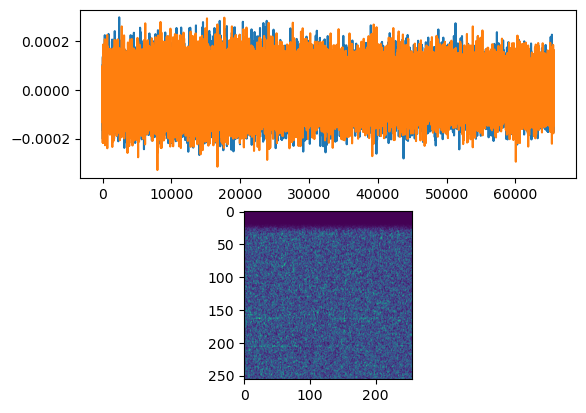

In [40]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax1.plot(sample)
# ax1.plot(sample[:])
# ax2.plot(yf)
# ax2.pcolormesh(time, freq, E)
# E = E.reshape(32, 32)
ax2.imshow(E)
print(E.max(), E.min())


In [28]:
fw = h5py.File('test.h5df', 'w')
samples = f['X'][:1000]
samples_complex = samples[:,:,0] + samples[:,:,1]*1j
fw['X'] = samples_complex
print(samples_complex)
fw.close()

[[ 0.0420274 +0.23476323j -0.2728826 +0.40513492j -0.26707262+0.22749889j
  ... -0.7055947 -0.28693035j -0.41157472+0.66826206j
   0.06487698+0.6358149j ]
 [ 1.198624  +0.4493616j   0.48543093+0.28272954j  0.8679219 -0.33194578j
  ... -1.2129315 -0.64293194j -0.38100415+0.793629j
   0.0864124 +1.0921808j ]
 [-0.22345497+0.18144214j  0.06201788-0.934319j    0.71949023+0.21791682j
  ...  0.7598529 +0.00820714j  0.3396765 +0.12928951j
   0.58232504+0.10775959j]
 ...
 [-0.65526354+1.3141742j  -0.22797489+0.71458805j -0.15369044-0.334317j
  ...  0.99782467+0.32496142j  0.09663352+0.01240547j
  -0.61931854-0.21981922j]
 [ 0.24303107+0.16762088j -0.6282393 +0.5441002j  -0.18113995+1.3121818j
  ...  0.61145395-0.4335994j   0.37691933+0.47625294j
  -0.3178522 +0.16766019j]
 [-0.4164746 +0.18334873j  0.3176018 -0.34742787j -0.12166007-0.01180055j
  ...  0.39715096-0.84145564j -0.5375824 -0.85893035j
   1.8187517 -0.4786465j ]]


In [69]:
fw = h5py.File('test.h5df', 'r')
print(fw['X'].shape)
fw.close()

(1000, 1024)


In [70]:
print(f['Z'][0], f['Z'][])

[-20] [-18]


In [117]:
from scipy.signal import stft

def data_transofrm(x, nperseg=64, downsample=1):
    _, _, Z = stft(x, nperseg=nperseg, return_onesided=False)
    ih, iw = downsample * 32, downsample * 32
    E = torch.tensor(np.abs(Z[len(Z)//2-1:-1, :-1])).reshape(1, 1, ih, iw)
    
    # print(Z.shape)
    # E = F.max_pool2d(E, kernel_size=downsample)
    E = torch.log10(E/torch.std(E, axis=1))
    E = F.interpolate(E, (32, 32))
    # E = np.abs(Z)

    # E = E.reshape((1,32,32))
    return E

def csv2input(csv_file, start=0, len=1024):
    data = np.loadtxt(csv_file)[start:start+len]
    nperseg = int(np.sqrt(len)) * 2
    downsample = int(nperseg // 64)
    input = data_transofrm(data, nperseg=nperseg, downsample=downsample)
    # print(input.shape)
    return input

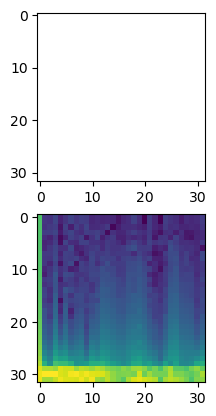

In [118]:
csv_file = '../audio_example.csv'
l = 4096
E2 = csv2input(csv_file=csv_file, start=100000, len=l)
img = E2.reshape(32, 32).numpy()
plt.figure()
ax11 = plt.subplot(2, 1, 1)
ax22 = plt.subplot(2, 1, 2)
ax11.imshow(img)
ax22.imshow(E)